In [1]:
#import neecessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#convert our output variable from categorical to numerical
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)

In [7]:
#separate the workers into two dataframes according to Attrition and compare their averages
attrition_yes = df.loc[df["Attrition_numeric"] == 1]
attrition_no = df.loc[df["Attrition_numeric"] == 0]

In [8]:
#concat to join the two DF, rename the columns and then give it some color :)
df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2).style.background_gradient(cmap="tab20_r",axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_7392\318186244.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_7392\318186244.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)


,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EmployeeCount,1.000000,1.000000
EmployeeNumber,1010.350000,1027.660000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000


In [26]:
#describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# EDA

**1.Overall Attrition Rate:** 
    Calculate the overall attrition rate at XYZ Company over the past year.

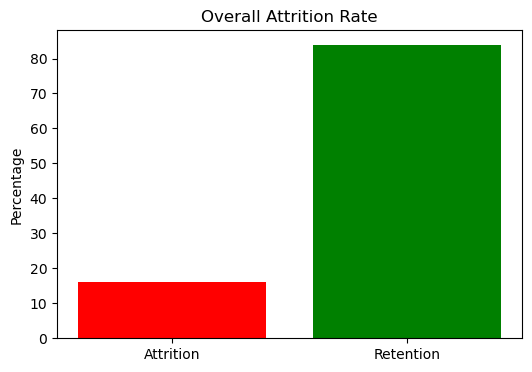

In [29]:
# Calculate Overall Attrition Rate
overall_attrition_rate = df["Attrition_numeric"].mean() * 100


plt.figure(figsize=(6, 4))
plt.bar(["Attrition", "Retention"], [overall_attrition_rate, 100 - overall_attrition_rate], color=['red', 'green'])
plt.title("Overall Attrition Rate")
plt.ylabel("Percentage")
plt.show()

2. **Top 5 Departments with Highest and Lowest Attrition Rates:** Identify the top 5 departments with the highest and lowest attrition rates.

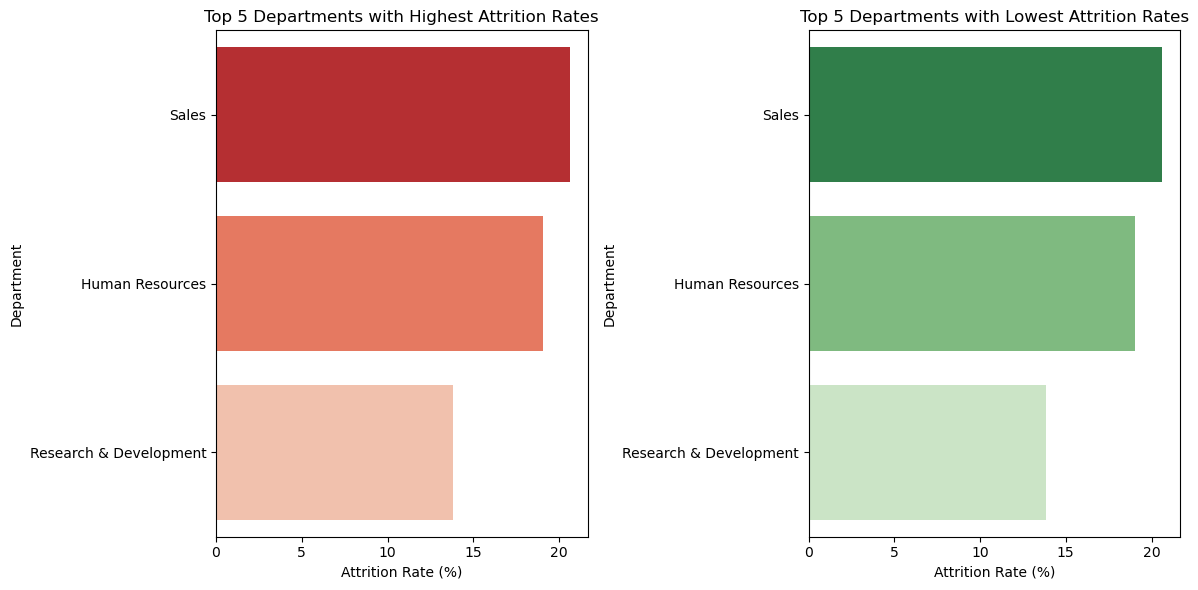

In [30]:
# Calculate attrition rates for each department
attrition_by_department = df.groupby('Department')['Attrition_numeric'].mean().sort_values(ascending=False)

# Top 5 Departments with Highest Attrition Rates
top_5_high_attrition = attrition_by_department.head(5)

# Top 5 Departments with Lowest Attrition Rates
top_5_low_attrition = attrition_by_department.tail(5)

# Visualize Top 5 Departments with Highest and Lowest Attrition Rates
plt.figure(figsize=(12, 6))

# Plotting Departments with Highest Attrition Rates
plt.subplot(1, 2, 1)
sns.barplot(x=top_5_high_attrition.values * 100, y=top_5_high_attrition.index, palette='Reds_r')
plt.title('Top 5 Departments with Highest Attrition Rates')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')

# Plotting Departments with Lowest Attrition Rates
plt.subplot(1, 2, 2)
sns.barplot(x=top_5_low_attrition.values * 100, y=top_5_low_attrition.index, palette='Greens_r')
plt.title('Top 5 Departments with Lowest Attrition Rates')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')

plt.tight_layout()
plt.show()

**3. Employee Satisfaction and Attrition:** Analyse the relationship between employee satisfaction and attrition.

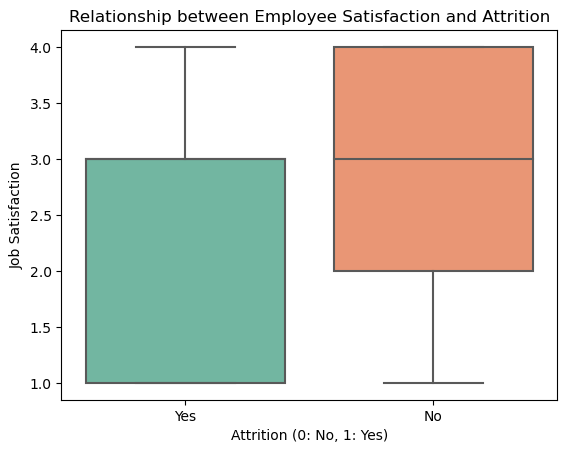

In [34]:
# Analyze Relationship between Employee Satisfaction and Attrition
sns.boxplot(x="Attrition", y="JobSatisfaction", data=df, palette="Set2")
plt.title("Relationship between Employee Satisfaction and Attrition")
plt.xlabel("Attrition (0: No, 1: Yes)")
plt.ylabel("Job Satisfaction")
plt.show()

**4.Job Levels and Attrition:** Compare the attrition rates of employees with different job levels.

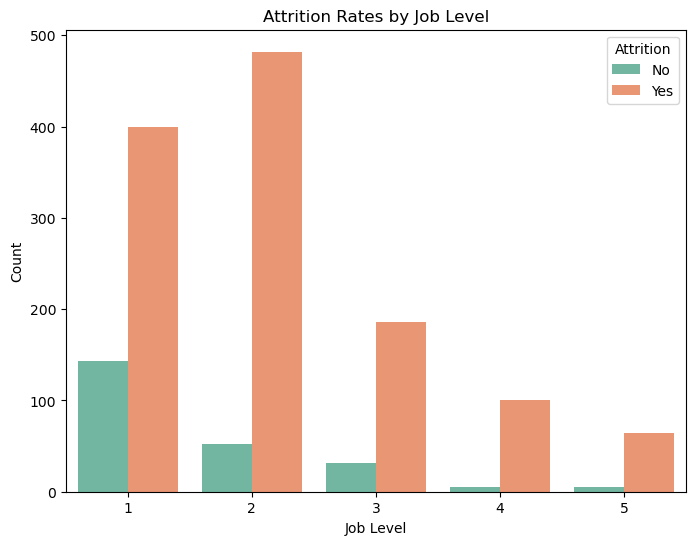

In [35]:
# Compare Attrition Rates by Job Level
plt.figure(figsize=(8, 6))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette="Set2")
plt.title("Attrition Rates by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

**5. Job Roles and Attrition:** Compare the attrition rates of employees with different job roles.

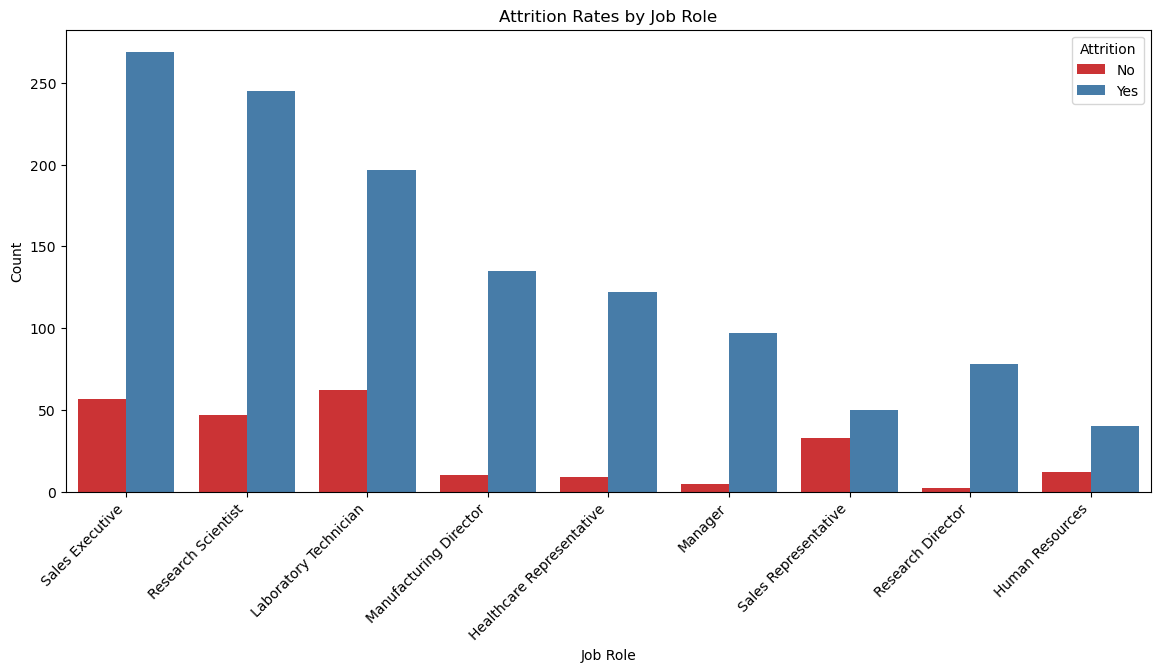

In [39]:
# Compare Attrition Rates by Job Role
plt.figure(figsize=(14, 6))
sns.countplot(x="JobRole", hue="Attrition", data=df, palette="Set1")
plt.title("Attrition Rates by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

**6. Employee Age and Attrition:** Analyse the relationship between employee age and attrition.

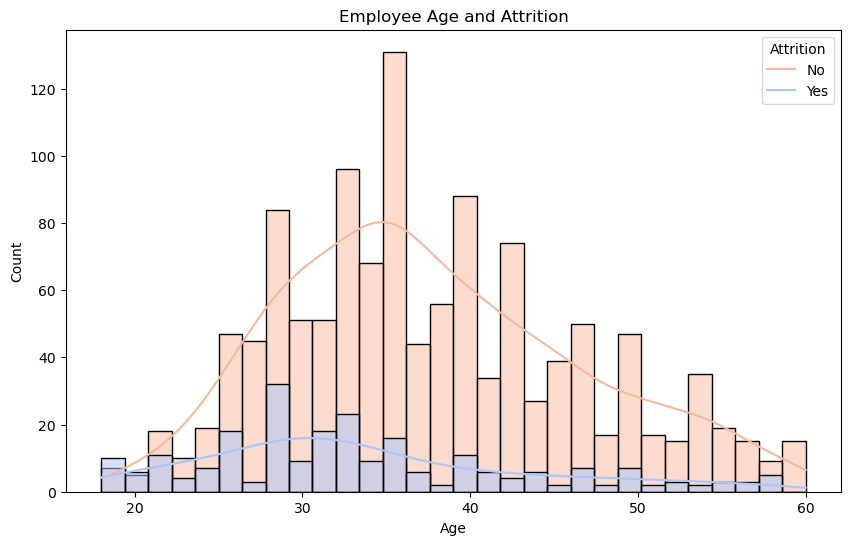

In [41]:
# Relationship between Employee Age and Attrition
plt.figure(figsize=(10, 6))
sns.histplot(x="Age", hue="Attrition", data=df, kde=True, palette="coolwarm", bins=30)
plt.title("Employee Age and Attrition")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

**7. Education and Attrition:** Compare the attrition rates of employees with different levels of education.

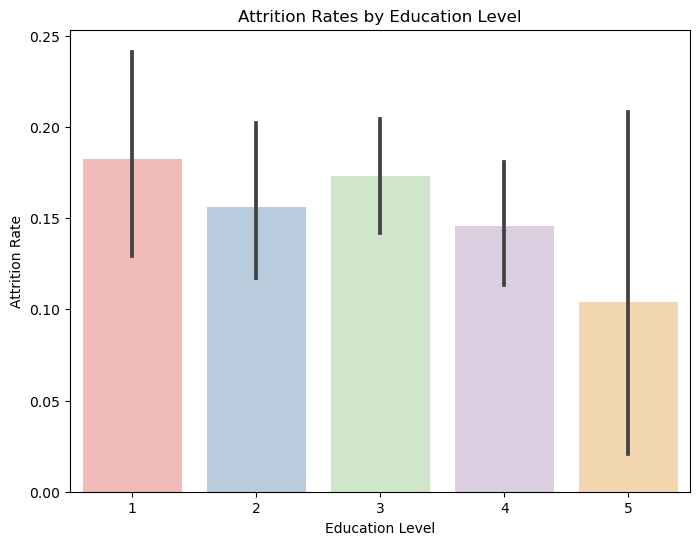

In [42]:
# Compare Attrition Rates by Education Level
plt.figure(figsize=(8, 6))
sns.barplot(x="Education", y="Attrition_numeric", data=df, palette="Pastel1")
plt.title("Attrition Rates by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Attrition Rate")
plt.show()

**8. Work Experience and Attrition:** Compare the attrition rates of employees with different work experience.

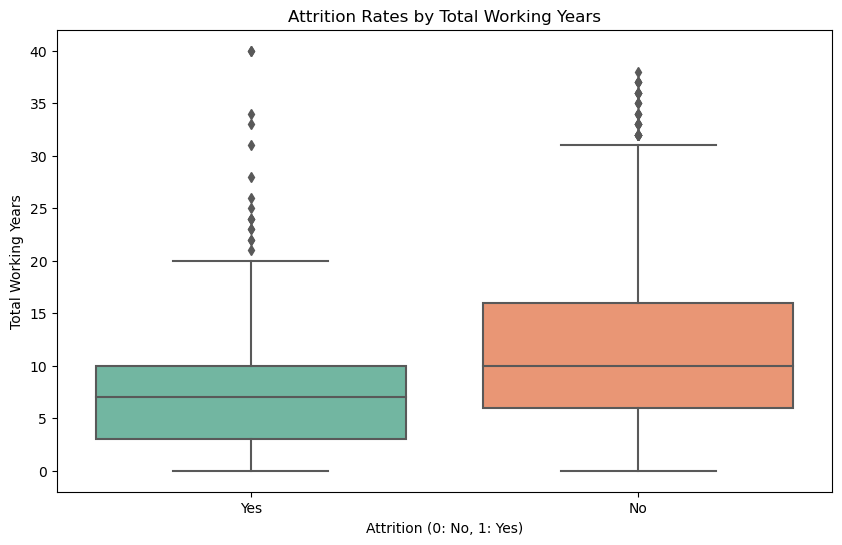

In [46]:
# Compare Attrition Rates by Total Working Years
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df, palette="Set2")
plt.title("Attrition Rates by Total Working Years")
plt.xlabel("Attrition (0: No, 1: Yes)")
plt.ylabel("Total Working Years")
plt.show()

**9. Gender and Attrition:** How is attrition affected by gender

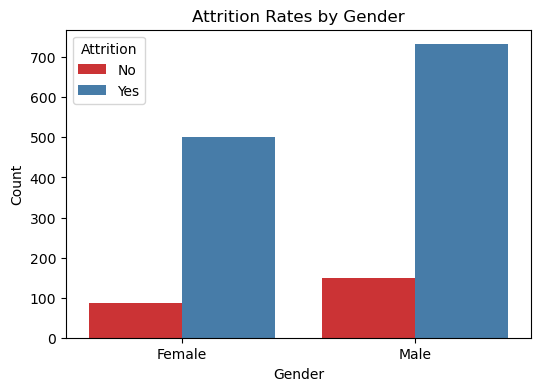

In [47]:
# Compare Attrition Rates by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Attrition", data=df, palette="Set1")
plt.title("Attrition Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

**10.Business Travel and Attrition:** How is attrition affected by business travel

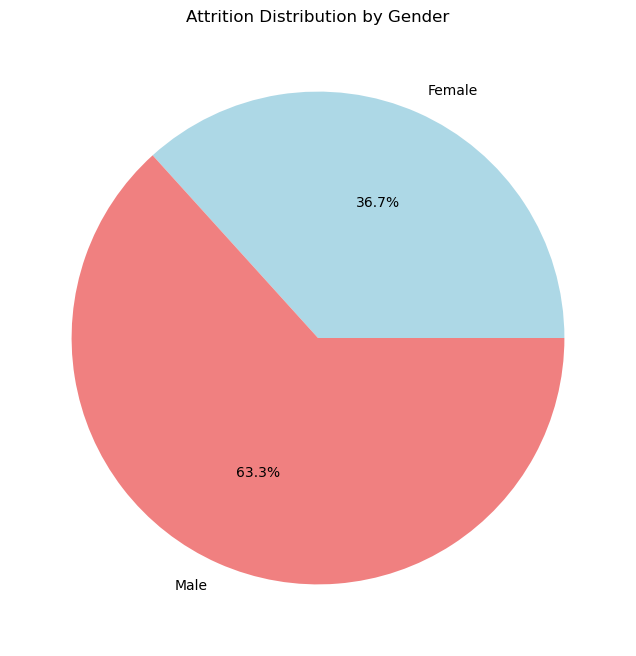

In [48]:
# Count of Attrition by Gender
attrition_by_gender = df.groupby("Gender")["Attrition_numeric"].value_counts().unstack()

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_by_gender[1], labels=attrition_by_gender.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Attrition Distribution by Gender")
plt.show()